# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The "census" data set that contains Census information from 1994.
2. For this model, I will be predicting if a person's capital gain
3. This is a supervised learning problem. It is a binary classification problem to predict if someone makes >50k a year.
4. I plan for my features to be based on race, sex, education, and age
5. This model with the label I have chosen could create value for a company by being able to predict how much a potential associate or employee would want to be compensated for a position.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [4]:
df.shape

(32561, 15)

In [5]:
# Define label
df['capital-gain']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    14084
Name: capital-gain, Length: 32561, dtype: int64

In [6]:
# Look at a list of my potential features
list(df.loc[:, df.columns != 'capital-gain'])

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income_binary']

In [7]:
# Counting the amount of missing values
count_nan = np.sum(df.isnull(), axis = 0)
count_nan

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [8]:
# Creating dummy variables with numerical values to keep record of missingness
df['age_na']=df['age'].isnull()
df['hours-per-week_na']=df['hours-per-week'].isnull()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False


In [9]:
# Getting the mean of the age and hours per week columns
mean_age = df['age'].mean()
mean_hours = df['hours-per-week'].mean()

# Filling missing values with mean
df['age'].fillna(value=mean_age, inplace=True)
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

In [10]:
# Check results to make sure there are no more missing numerical values
np.sum(df['age'].isnull(), axis = 0)

0

In [11]:
np.sum(df['hours-per-week'].isnull(), axis = 0)

0

In [12]:
# Inspecting another column with missing values, occupation
df['occupation']

0             Adm-clerical
1          Exec-managerial
2        Handlers-cleaners
3        Handlers-cleaners
4           Prof-specialty
               ...        
32556         Tech-support
32557    Machine-op-inspct
32558         Adm-clerical
32559         Adm-clerical
32560      Exec-managerial
Name: occupation, Length: 32561, dtype: object

In [13]:
df['occupation'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: occupation, Length: 32561, dtype: bool

In [14]:
df['occupation'].dtype

dtype('O')

In [15]:
# Replace missing values in occupation in columns 
df['occupation'].fillna('Information unavailable', inplace=True)

In [16]:
# Check to see if there is still any missing values in occupation column
np.sum(df['occupation'].isnull())

0

In [17]:
df['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [18]:
# Replacing missing workclass values with most its most frequent values
df['workclass'].fillna('Information unavaiable', inplace=True)

In [19]:
# Check to see if workclass column still has missing values
np.sum(df['workclass'].isnull())

0

In [20]:
# Computing the n-th percentile of education-num column
edunum_99 = np.percentile(df['education-num'], 99.0)
edunum_99

16.0

In [21]:
# Importing stats module from scipy package to handle outliers

import scipy.stats as stats

In [22]:
# Winsorize education-num column
df['education-num_win']=stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na,education-num_win
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False,13
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False,13
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False,9
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False,7
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False,13
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,False,False,14
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K,False,False,5
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K,False,False,9
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K,False,False,14
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K,False,False,13


In [23]:
# Drop columns
df.drop(['native-country','relationship','marital-status'], axis=1, inplace=True)

In [24]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'occupation', 'race', 'sex_selfID', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'age_na', 'hours-per-week_na',
       'education-num_win'],
      dtype='object')

In [25]:
# Getting a list of all the 'object' type values to one-hot-encode
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['workclass', 'education', 'occupation', 'race', 'sex_selfID', 'income_binary']

In [26]:
df[to_encode].nunique()

workclass         9
education        16
occupation       15
race              5
sex_selfID        2
income_binary     2
dtype: int64

In [27]:
# Get the top 10 education values
top_10_EDU = list(df['education'].value_counts().head(10).index)
top_10_EDU

['HS-grad',
 'Some-college',
 'Bachelors',
 'Masters',
 'Assoc-voc',
 '11th',
 'Assoc-acdm',
 '10th',
 '7th-8th',
 'Prof-school']

In [28]:
# Get top 10 occupations
top_10_occ = list(df['occupation'].value_counts().head(10).index)
top_10_occ

['Prof-specialty',
 'Craft-repair',
 'Exec-managerial',
 'Adm-clerical',
 'Sales',
 'Other-service',
 'Machine-op-inspct',
 'Information unavailable',
 'Transport-moving',
 'Handlers-cleaners']

In [29]:
# One-hot-encode values in education column
for value in top_10_EDU:
    df['education_' + value] = np.where(df['education']==value,1,0)

In [30]:
# One-hot-encode values in occupation
for value in top_10_occ:
    df['occupation'+value] = np.where(df['occupation']==value,1,0)

In [31]:
# Drop originial edu column from df
df.drop(columns = 'education', inplace=True)

# Drop original occupation column from df
df.drop(columns = 'occupation', inplace=True)

# Remove both education and occupation from to_encode list
to_encode.remove('education')
to_encode.remove('occupation')

In [32]:
# Inspect my new columns and their values
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income_binary',
       'age_na', 'hours-per-week_na', 'education-num_win', 'education_HS-grad',
       'education_Some-college', 'education_Bachelors', 'education_Masters',
       'education_Assoc-voc', 'education_11th', 'education_Assoc-acdm',
       'education_10th', 'education_7th-8th', 'education_Prof-school',
       'occupationProf-specialty', 'occupationCraft-repair',
       'occupationExec-managerial', 'occupationAdm-clerical',
       'occupationSales', 'occupationOther-service',
       'occupationMachine-op-inspct', 'occupationInformation unavailable',
       'occupationTransport-moving', 'occupationHandlers-cleaners'],
      dtype='object')

In [33]:
# One hot encode the rest of my object columns
for colname in to_encode:
    df_encoded = pd.get_dummies(df[colname], prefix=colname +'_')
    df = df.join(df_encoded)

In [34]:
# Remove original columns
df.drop(columns = to_encode, axis = 1, inplace=True)

In [35]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education-num_win,education_HS-grad,...,workclass__Without-pay,race__Amer-Indian-Inuit,race__Asian-Pac-Islander,race__Black,race__Other,race__White,sex_selfID__Female,sex_selfID__Non-Female,income_binary__<=50K,income_binary__>50K
0,39.0,77516,13,2174,0,40.0,False,False,13,0,...,0,0,0,0,0,1,0,1,1,0
1,50.0,83311,13,0,0,13.0,False,False,13,0,...,0,0,0,0,0,1,0,1,1,0
2,38.0,215646,9,0,0,40.0,False,False,9,1,...,0,0,0,0,0,1,0,1,1,0
3,53.0,234721,7,0,0,40.0,False,False,7,0,...,0,0,0,1,0,0,0,1,1,0
4,28.0,338409,13,0,0,40.0,False,False,13,0,...,0,0,0,1,0,0,1,0,1,0


In [36]:
# Check for any remaining missing values
df.isnull().values.any()

False

In [37]:
df.shape

(32561, 47)

In [38]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education-num_win,education_HS-grad,...,workclass__Without-pay,race__Amer-Indian-Inuit,race__Asian-Pac-Islander,race__Black,race__Other,race__White,sex_selfID__Female,sex_selfID__Non-Female,income_binary__<=50K,income_binary__>50K
0,39.0,77516,13,2174,0,40.0,False,False,13,0,...,0,0,0,0,0,1,0,1,1,0
1,50.0,83311,13,0,0,13.0,False,False,13,0,...,0,0,0,0,0,1,0,1,1,0
2,38.0,215646,9,0,0,40.0,False,False,9,1,...,0,0,0,0,0,1,0,1,1,0
3,53.0,234721,7,0,0,40.0,False,False,7,0,...,0,0,0,1,0,0,0,1,1,0
4,28.0,338409,13,0,0,40.0,False,False,13,0,...,0,0,0,1,0,0,1,0,1,0


In [39]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'age_na', 'hours-per-week_na', 'education-num_win',
       'education_HS-grad', 'education_Some-college', 'education_Bachelors',
       'education_Masters', 'education_Assoc-voc', 'education_11th',
       'education_Assoc-acdm', 'education_10th', 'education_7th-8th',
       'education_Prof-school', 'occupationProf-specialty',
       'occupationCraft-repair', 'occupationExec-managerial',
       'occupationAdm-clerical', 'occupationSales', 'occupationOther-service',
       'occupationMachine-op-inspct', 'occupationInformation unavailable',
       'occupationTransport-moving', 'occupationHandlers-cleaners',
       'workclass__Federal-gov', 'workclass__Information unavaiable',
       'workclass__Local-gov', 'workclass__Never-worked', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay',
       'race__Amer

<AxesSubplot: >

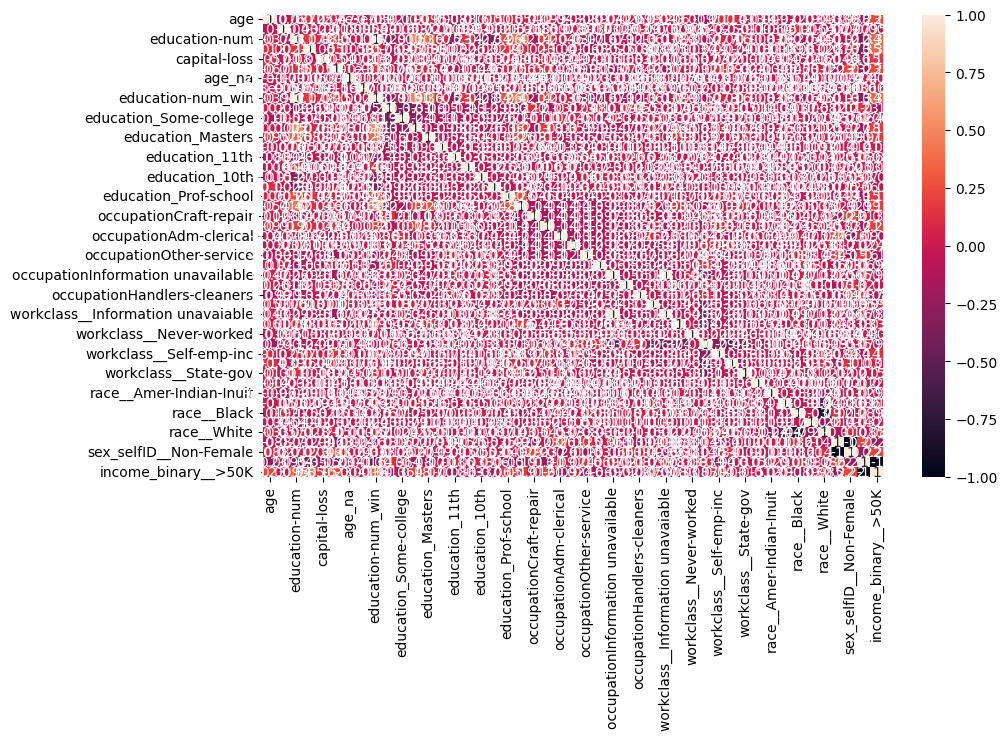

In [40]:
# Test for correlation using correlation coefficient
%matplotlib inline

cor = df.corr()

# Plotting heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

In [41]:
# Correlation matrix rounded 5 decimal places
corr_matrix = round(df.corr(),5)
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education-num_win,education_HS-grad,...,workclass__Without-pay,race__Amer-Indian-Inuit,race__Asian-Pac-Islander,race__Black,race__Other,race__White,sex_selfID__Female,sex_selfID__Non-Female,income_binary__<=50K,income_binary__>50K
age,1.00000,-0.07608,0.03669,0.12470,0.05748,0.06657,0.00000,-0.00004,0.03855,0.01992,...,0.01401,-0.00968,-0.01198,-0.01894,-0.03420,0.03325,-0.08840,0.08840,-0.23310,0.23310
fnlwgt,-0.07608,1.00000,-0.04319,-0.00223,-0.01025,-0.01805,-0.00902,-0.00577,-0.04213,-0.00157,...,-0.00305,-0.06415,-0.05132,0.11801,0.00638,-0.05690,-0.02686,0.02686,0.00946,-0.00946
education-num,0.03669,-0.04319,1.00000,0.16709,0.07992,0.14655,-0.00171,-0.00567,0.99918,-0.28982,...,-0.00814,-0.02934,0.06209,-0.07527,-0.04413,0.05135,-0.01228,0.01228,-0.33515,0.33515
capital-gain,0.12470,-0.00223,0.16709,1.00000,-0.05514,0.10099,-0.00531,0.00498,0.16820,-0.06941,...,-0.00110,-0.00182,0.00091,-0.03014,-0.01194,0.02828,-0.07256,0.07256,-0.34756,0.34756
capital-loss,0.05748,-0.01025,0.07992,-0.05514,1.00000,0.05420,-0.00721,-0.00151,0.08045,-0.02883,...,-0.00449,-0.01295,0.00447,-0.02176,-0.00596,0.02104,-0.04557,0.04557,-0.15053,0.15053
hours-per-week,0.06657,-0.01805,0.14655,0.10099,0.05420,1.00000,0.00225,-0.00000,0.14728,0.00756,...,-0.01305,-0.00448,-0.00472,-0.05349,-0.00716,0.05007,-0.22822,0.22822,-0.22840,0.22840
age_na,0.00000,-0.00902,-0.00171,-0.00531,-0.00721,0.00225,1.00000,-0.00271,-0.00196,0.00070,...,-0.00147,0.00652,-0.00539,0.01402,-0.00167,-0.01038,-0.00240,0.00240,0.00409,-0.00409
hours-per-week_na,-0.00004,-0.00577,-0.00567,0.00498,-0.00151,-0.00000,-0.00271,1.00000,-0.00581,-0.00516,...,-0.00208,0.00285,-0.00241,0.00086,-0.00240,0.00032,0.00361,-0.00361,0.00164,-0.00164
education-num_win,0.03855,-0.04213,0.99918,0.16820,0.08045,0.14728,-0.00196,-0.00581,1.00000,-0.29493,...,-0.00828,-0.02946,0.06328,-0.07601,-0.04314,0.05116,-0.01269,0.01269,-0.33680,0.33680
education_HS-grad,0.01992,-0.00157,-0.28982,-0.06941,-0.02883,0.00756,0.00070,-0.00516,-0.29493,1.00000,...,0.01421,0.01263,-0.04078,0.03714,-0.00680,-0.01243,-0.01168,0.01168,0.13119,-0.13119


In [42]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'age_na', 'hours-per-week_na', 'education-num_win',
       'education_HS-grad', 'education_Some-college', 'education_Bachelors',
       'education_Masters', 'education_Assoc-voc', 'education_11th',
       'education_Assoc-acdm', 'education_10th', 'education_7th-8th',
       'education_Prof-school', 'occupationProf-specialty',
       'occupationCraft-repair', 'occupationExec-managerial',
       'occupationAdm-clerical', 'occupationSales', 'occupationOther-service',
       'occupationMachine-op-inspct', 'occupationInformation unavailable',
       'occupationTransport-moving', 'occupationHandlers-cleaners',
       'workclass__Federal-gov', 'workclass__Information unavaiable',
       'workclass__Local-gov', 'workclass__Never-worked', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay',
       'race__Amer

In [43]:
#Find what labels most correlate with label
corrs = corr_matrix['capital-gain']
corrs

age                                  0.06657
fnlwgt                              -0.01805
education-num                        0.14655
capital-gain                         0.10099
capital-loss                         0.05420
hours-per-week                       1.00000
age_na                               0.00225
hours-per-week_na                   -0.00000
education-num_win                    0.14728
education_HS-grad                    0.00756
education_Some-college              -0.06896
education_Bachelors                  0.07781
education_Masters                    0.06428
education_Assoc-voc                  0.01978
education_11th                      -0.10057
education_Assoc-acdm                 0.00049
education_10th                      -0.04567
education_7th-8th                   -0.01216
education_Prof-school                0.07534
occupationProf-specialty             0.05973
occupationCraft-repair               0.05699
occupationExec-managerial            0.13777
occupation

In [44]:
# Exclude values that do no matter, such as capital-gain
exclude = ['capital-gain']
df.corr()['capital-gain'].drop(exclude, axis=0)

age                                  0.124705
fnlwgt                              -0.002234
education-num                        0.167089
capital-loss                        -0.055138
hours-per-week                       0.100995
age_na                              -0.005314
hours-per-week_na                    0.004981
education-num_win                    0.168202
education_HS-grad                   -0.069411
education_Some-college              -0.044785
education_Bachelors                  0.076453
education_Masters                    0.087559
education_Assoc-voc                  0.000203
education_11th                      -0.032062
education_Assoc-acdm                -0.006189
education_10th                      -0.030064
education_7th-8th                   -0.022454
education_Prof-school                0.143249
occupationProf-specialty             0.099913
occupationCraft-repair              -0.023411
occupationExec-managerial            0.102973
occupationAdm-clerical            

In [45]:
# Organize the matrix in descending order
corrs = df.corr()['capital-gain'].drop(exclude, axis = 0)

corrs_sorted = corrs.sort_values(ascending = False)
corrs_sorted

income_binary__>50K                  0.347555
education-num_win                    0.168202
education-num                        0.167089
education_Prof-school                0.143249
age                                  0.124705
occupationExec-managerial            0.102973
workclass__Self-emp-inc              0.101240
hours-per-week                       0.100995
occupationProf-specialty             0.099913
education_Masters                    0.087559
education_Bachelors                  0.076453
sex_selfID__Non-Female               0.072555
race__White                          0.028283
workclass__Self-emp-not-inc          0.024286
occupationSales                      0.010580
workclass__Federal-gov               0.008053
hours-per-week_na                    0.004981
race__Asian-Pac-Islander             0.000909
education_Assoc-voc                  0.000203
workclass__Local-gov                 0.000128
workclass__Without-pay              -0.001097
race__Amer-Indian-Inuit           

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I removed a few columns from my feature list that I felt would be irrelevant in answering the question to my machine learning problem such as marital status, relationship, and country of origin.
2. To prepare my data for modeling, the techniques I will use are Sciki-Learn for feature selection
3. The models I plan to use are Decision Trees and an ensemble of decision trees, Gradient Boosted Decision Trees since they are all known to work well with large datasets and when trained right, give better accuracy than other models.
4. My plan to train my model is by implementing grid searches to find the optimal parameter for models, change my hyperparameters. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [47]:
y = df['capital-gain']
X = df.drop(columns = 'capital-gain', axis=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1234)

In [49]:
# Setting up a Parameter Grid to find the best values for maximum depth of trees and minimum number of leafs
md = [2**n for n in range(2,6)]
msl = [25*2**n for n in range(0,3)]
param_grid = {'max_depth': md, 'min_samples_leaf':msl}

param_grid

{'max_depth': [4, 8, 16, 32], 'min_samples_leaf': [25, 50, 100]}

In [50]:
print('Running grid search...')
# Creating my Decision Tree Model
model = DecisionTreeClassifier()

# Running a grid search on my model
grid = GridSearchCV(model, param_grid, cv = 5)

# Fit my model to the training data
grid_search = grid.fit(X_train, y_train)

print('Done.')

Running grid search...


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Done.


In [51]:
# Identify the best hyperparameter values for max_depth and min_samples_leaf using best_estimator_
best_md = grid_search.best_estimator_.max_depth
best_msl = grid_search.best_estimator_.min_samples_leaf

print('Best value for max depth: {0}'.
      format(best_md))
print('Best value for min samples leaf: {0}',
      format(best_msl))

Best value for max depth: 4
Best value for min samples leaf: {0} 100


In [52]:
# Get the accuracy score with the best values for max depth and min samples leaf
print('Accuracy score: {0}'.format(grid_search.best_score_))

Accuracy score: 0.9165387014723152


In [53]:
# Train the model with the best max_depth and min_samples_leaf values 
model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 100)

# Fitting my model with the training data
model.fit(X_train, y_train)

# Making predictions on the test data using predict() method
class_label_predictions = model.predict(X_test)

# Computing the accuracy score on the test data
acc_score = accuracy_score(y_test, class_label_predictions)

print('Accuracy score: {0}'.format(acc_score))

Accuracy score: 0.9173959772762168


In [54]:
# Performing feature selection using sklearn's "feature importance"
feature_imp = model.feature_importances_

# Creating a dataframe with a list of all the features and their scores
df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})

# Sorting the features in descending order
df_sorted = df_features.sort_values(by = 'imp', ascending=False)

# Getting the top 20 values
top_five = df_sorted.iloc[:5]['name'].tolist()
print('Top five features: {0}'.format(top_five))

Top five features: ['income_binary__>50K', 'capital-loss', 'age', 'education_Prof-school', 'fnlwgt']


Text(0, 0.5, 'Normalized importance')

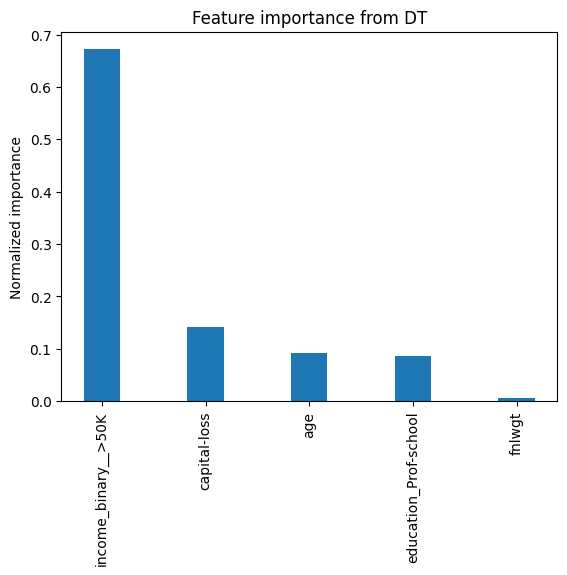

In [55]:
# Plot the feature importance from Decision Tree model using a bar plot
fig, ax = plt.subplots()
ax.bar(np.arange(5), sorted(model.feature_importances_, reverse = True)[:5], width=0.35)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(top_five, rotation=90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

In [ ]:
# Training two GBDTs
print('Begin GBDT Implementation (this will take a few minutes)...')
#Creating a GradientBoostingClassifier model with a max depth of 2
gbdt_4_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 4)

# Fit the model to my training data
gbdt_4_model.fit(X_train, y_train)

#Making the predictions on my model using the predict_proba() method
gbdt_4_preds = gbdt_4_model.predict_proba(X_test)
gbdt_4_predictions = list(gbdt_4_preds[:, -1])

# Creating another GradientBoostingClassifier model with a max depth of 10
gbdt_10_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 10)

# Fitting the model to the training data
gbdt_10_model.fit(X_train, y_train)

# Making predictions on the model using predict_proba() method
gbdt_10_preds = gbdt_10_model.predict_proba(X_test)
gbdt_10_predictions = list(gbdt_10_preds[:, - 1])

print('Done.')